   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

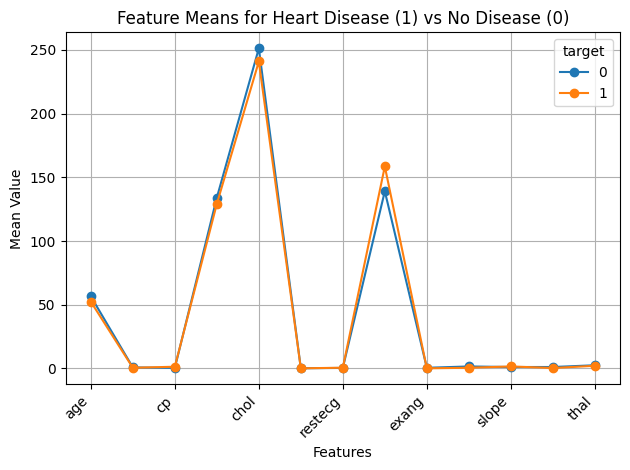

Test Accuracy: 0.99


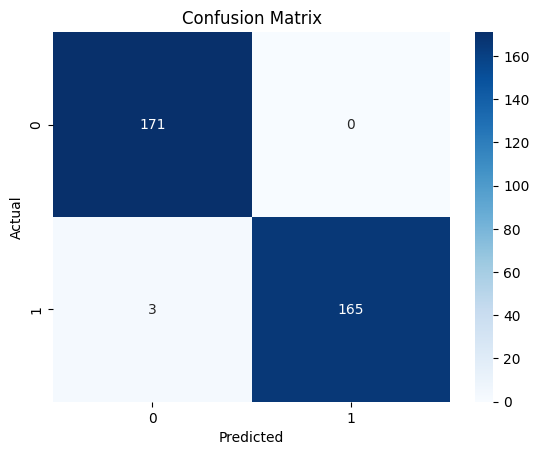

Cross-Validation Accuracy: 0.98


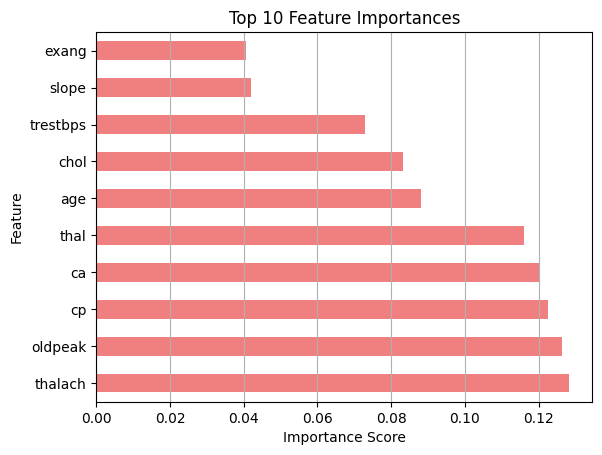

In [4]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# 2. Load and Explore the Data
df = pd.read_csv("heart.csv")
print(df.head())
print(df.info())

# 3. Clean Data (drop unnecessary columns if any)
if 'id' in df.columns:
    df = df.drop(['id'], axis=1)

# 4. Line Plot of Feature Means for each Class
means = df.groupby('target').mean().T # Transpose to plot features on x-axis
means.plot(kind='line', marker='o')
plt.title("Feature Means for Heart Disease (1) vs No Disease (0)")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. Prepare Data for Model
X = df.drop('target', axis=1) # Features
y = df['target'] # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# 6. Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 7. Evaluate Model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 8. Cross-Validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f}")

# 9. Visualizing Feature Importances
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='lightcoral')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x')
plt.show()